# Modelagem Preditiva em Registros Eletrônicos de Saúde

O objetivo neste projeto foi prever se um paciente poderá ser readmitido em uma clínica no período de 30 dias após alta. Para isso, foi feito a construção de diversos modelos preditivos usando registros eletrônicos de saúde de uma clínica fictícia.

Esse projeto teve como base uma pesquisa realizada em 2018, chamada:

Using Electronic Health Records and Machine Learning to Make Medical-Related Predictions from Non-Medical Data

https://ieeexplore.ieee.org/document/8614004

### Registros Eletrônicos de Saúde (Electronic Health Records)

Um Registro Eletrônico de Saúde (Electronic Health Records - EHR) é uma versão digital da ficha de papel de um paciente. Os EHRs são registros em tempo real, centrados no paciente, que tornam as informações disponíveis instantânea e seguramente para usuários autorizados. Embora um EHR contenha os históricos médicos e de tratamento dos pacientes, um sistema de EHR é construído para ir além dos dados clínicos coletados no consultório de um prestador de serviços e pode incluir uma visão mais ampla do atendimento de um paciente. Os EHRs são uma parte vital da TI em saúde e podem:

- Conter o histórico médico do paciente, diagnósticos, medicamentos, planos de tratamento, datas de imunização, alergias, imagens de radiologia e resultados laboratoriais e de testes.


- Permitir acesso a ferramentas baseadas em evidências que os provedores podem usar para tomar decisões sobre o atendimento de um paciente.


- Automatiza e simplifica o fluxo de trabalho do provedor.

Um dos principais recursos de um EHR é que as informações de saúde podem ser criadas e gerenciadas por provedores autorizados em um formato digital capaz de ser compartilhado com outros provedores em mais de uma organização de saúde. Os EHRs são construídos para compartilhar informações com outros prestadores de cuidados de saúde e organizações - como laboratórios, especialistas, instalações de imagens médicas, farmácias, instalações de emergência e clínicas de escolas e locais de trabalho - para que eles contenham informações de todos os clínicos envolvidos no atendimento de um paciente.

## 1.0 - Carregando os Dados e Compreendendo as Variáveis

In [1]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/dataset.csv', index_col = [0])
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


Dicionário de Dados

- IDADE - Idade do paciente (variável numérica)
- SEXO_F - paciente do sexo feminino (variável categórica)
- SEXO_M - paciente do sexo masculino (variável categórica)
- ADM_CORRENTE_DIAS - Dias desde a admissão atual (variável numérica)
- RECEB_MEDICAMENTOS - Recebeu medicamentos na última internação (variável categórica)
- FEZ_EXAMES - Fez exames na última internação (variável categórica)
- DEPEND_QUIMICO - Dependendo químico (variável categórica)
- FUMANTE - Fumante (variável categórica)
- ALCOOLISMO - Alcoolismo (variável categórica)
- NUM_DIAS_INT_PREVIA - Número de internações anteriores (variável numérica)
- ADM_PREVIA_DIAS - Dias da admissão anterior (variável numérica)
- NUM_DIAS_LIC_MEDICA - Licença médica (variável numérica)
- READMISSAO_30_DIAS - Readmissão dentro de 30 dias após a alta. Variável target. 0 - Não / 1 - Sim

## 2.0 - Análise Exploratória

In [3]:
# Shape
dataset.shape

(117180, 13)

In [4]:
# Tipos de Dados
dataset.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [5]:
# Resumo Estatístico
dataset.describe()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
count,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000,117180.000000
mean,65.066522,0.428239,0.571761,4.707680,0.160266,0.237020,0.597440,0.005274,0.008269,5.301988,12.328179,0.314456,0.189384
std,17.965229,0.494826,0.494826,6.257739,0.366854,0.425256,0.490416,0.072430,0.090559,14.324146,26.846820,3.366208,0.391815
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,12.000000,0.000000,0.000000
max,114.000000,1.000000,1.000000,307.000000,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,627.000000,315.000000,1.000000


In [6]:
# Verificando se tem valores ausentes
# Total por variável
dataset.isnull().sum()

IDADE                  0
SEXO_F                 0
SEXO_M                 0
ADM_CORRENTE_DIAS      0
RECEB_MEDICAMENTOS     0
FEZ_EXAMES             0
DEPEND_QUIMICO         0
FUMANTE                0
ALCOOLISMO             0
NUM_DIAS_INT_PREVIA    0
ADM_PREVIA_DIAS        0
NUM_DIAS_LIC_MEDICA    0
READMISSAO_30_DIAS     0
dtype: int64

In [7]:
# Total de linhas por coluna
dataset.count() 

IDADE                  117180
SEXO_F                 117180
SEXO_M                 117180
ADM_CORRENTE_DIAS      117180
RECEB_MEDICAMENTOS     117180
FEZ_EXAMES             117180
DEPEND_QUIMICO         117180
FUMANTE                117180
ALCOOLISMO             117180
NUM_DIAS_INT_PREVIA    117180
ADM_PREVIA_DIAS        117180
NUM_DIAS_LIC_MEDICA    117180
READMISSAO_30_DIAS     117180
dtype: int64

In [8]:
# Linhas contendo dados duplicados
linha_duplicadas = dataset[dataset.duplicated()]
print("Número de linhas duplicadas: ", linha_duplicadas.shape[0])

# São realmente dados duplicados?

Número de linhas duplicadas:  60839


In [9]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [10]:
# Função para visualizar a distribuição de cada variável
def cria_histograma(dataset, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataset[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature + " Distribuição", color = 'DarkRed')
        
    fig.tight_layout()  
    plt.show()

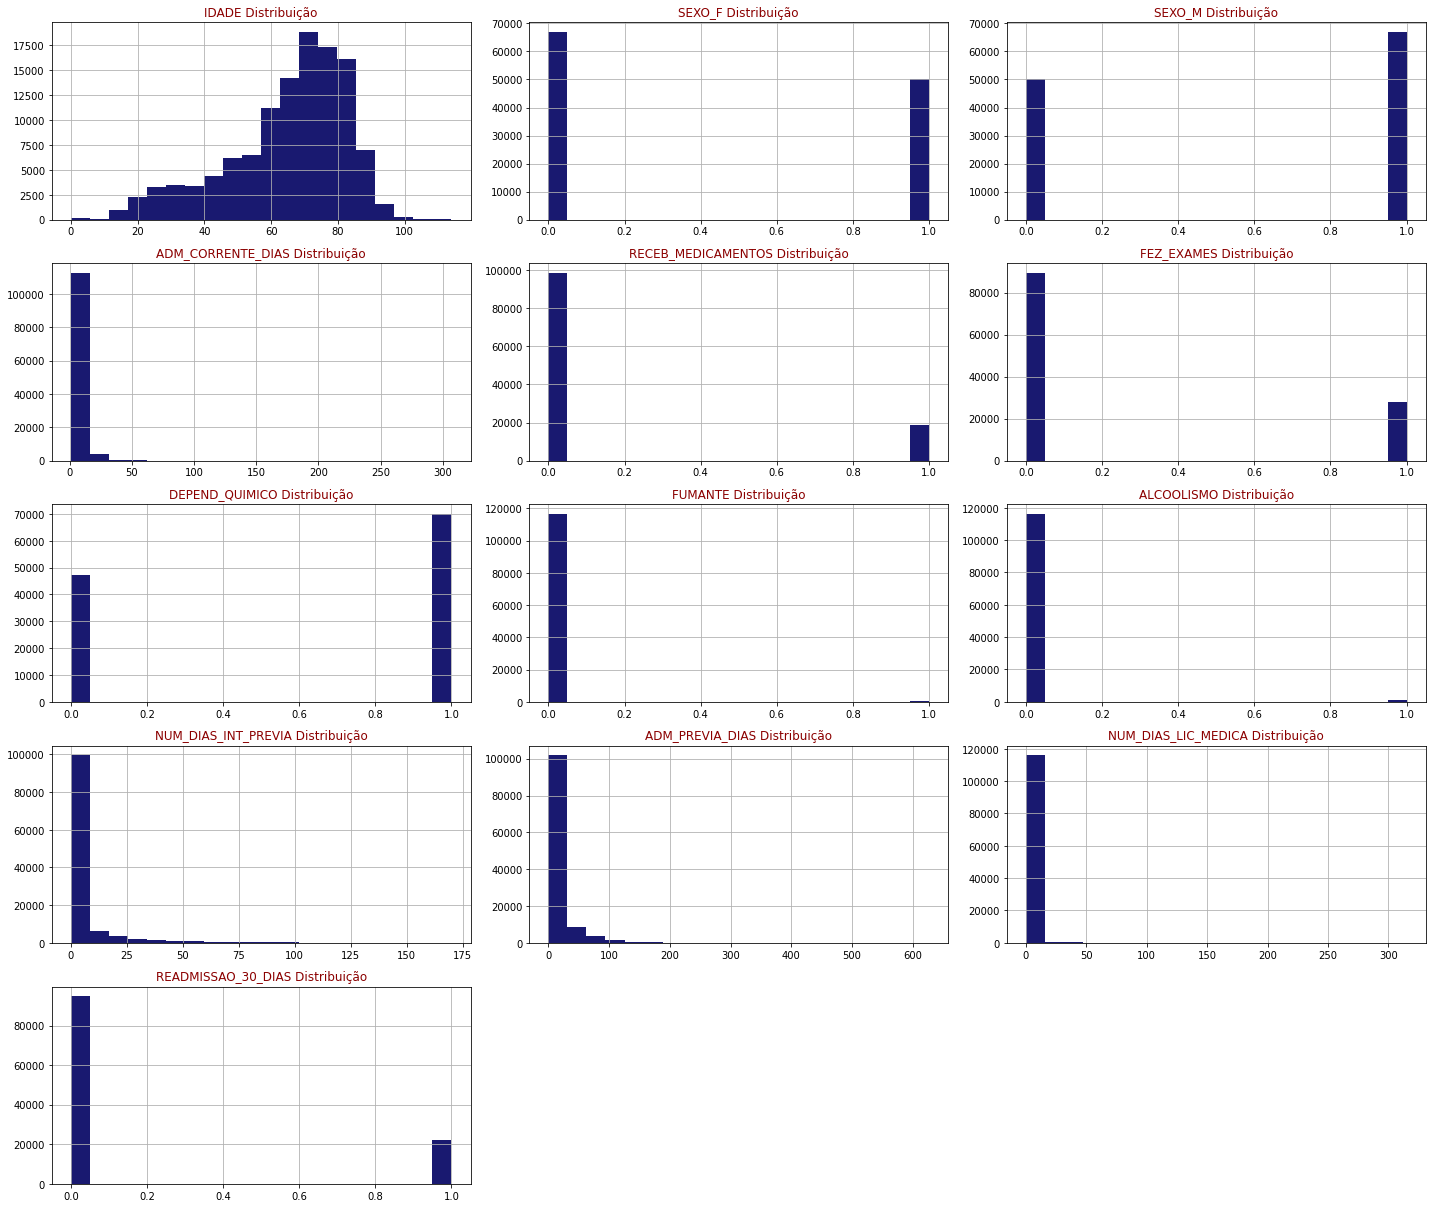

In [11]:
# Executa a função
cria_histograma(dataset, dataset.columns, 6, 3)

### 2.1 - Checando Outliers

In [12]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


<AxesSubplot:xlabel='IDADE'>

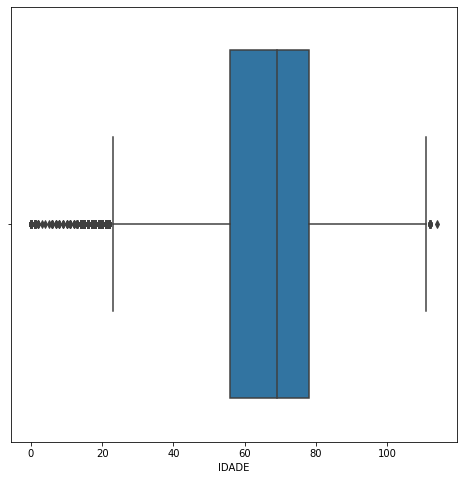

In [13]:
# Visualizando os outliers da variável IDADE
sns.boxplot(dataset.IDADE)

Na estatística descritiva, um gráfico de caixa (Boxplot) é um método para representar graficamente grupos de dados numéricos através de seus quartis. Os gráficos de caixa também podem ter linhas que se estendem verticalmente (ou horizontalmente) a partir das caixas (bigodes), indicando variabilidade fora dos quartis superior e inferior. Os outliers podem ser plotados como pontos individuais.

A definição acima sugere que, se houver um outlier, ele será plotado como ponto no boxplot.

O gráfico acima mostra dois pontos bem acima de 100 anos, estes são outliers, pois não estão incluídos na caixa, ou seja, nenhum lugar perto dos quartis. O mesmo raciocínio para os pontos abaixo de 20 anos.

In [14]:
# Outliers para a variável IDADE
outliers_idade = dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)] 
outliers_idade.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
5204,0.0,0,1,3,1,0,0,0,0,0,0,0,0
9588,0.0,1,0,1,0,1,0,0,0,0,0,0,0
12103,2.0,1,0,1,1,0,0,0,0,1,3,0,0
19961,0.0,0,1,13,0,0,1,0,0,0,0,0,0
21779,0.0,0,1,2,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

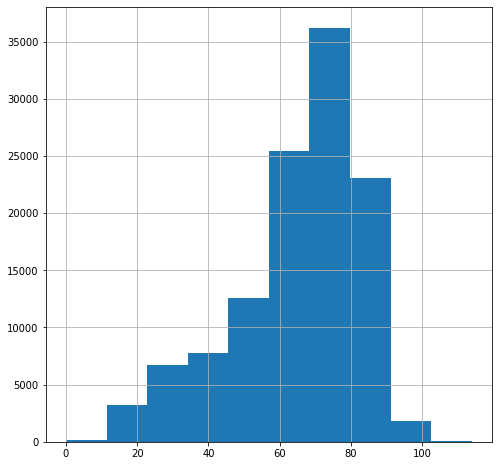

In [15]:
# Histograma da variável IDADE antes da limpeza
dataset.IDADE.hist()

<AxesSubplot:xlabel='IDADE'>

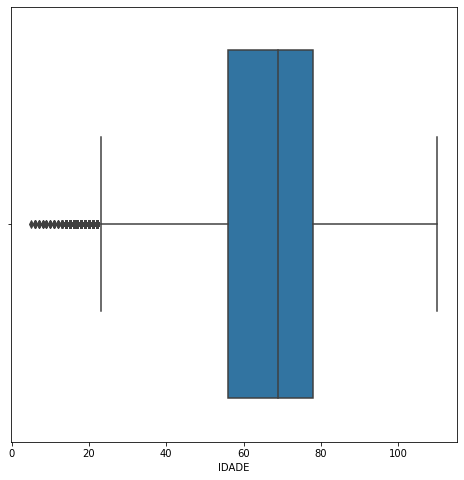

In [16]:
# Removendo os outliers
dataset = dataset.drop(dataset[(dataset['IDADE'] > 110) | (dataset['IDADE'] < 5)].index)
sns.boxplot(dataset.IDADE)

<AxesSubplot:>

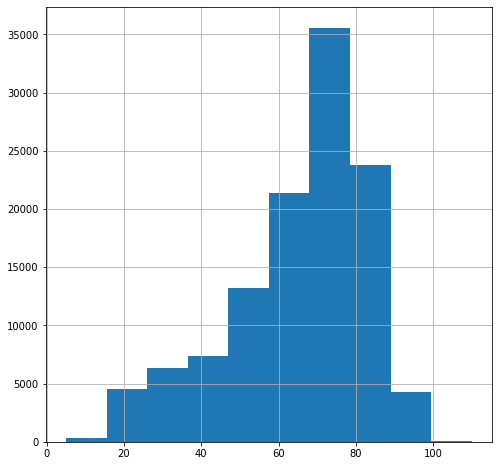

In [17]:
# Histograma da variável idade após a limpeza
dataset.IDADE.hist()

<AxesSubplot:xlabel='ADM_CORRENTE_DIAS'>

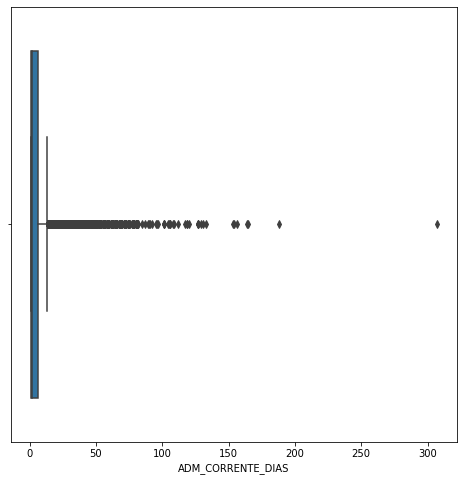

In [18]:
# Visualizando os outliers da variável ADM_CORRENTE_DIAS
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

<AxesSubplot:xlabel='ADM_CORRENTE_DIAS'>

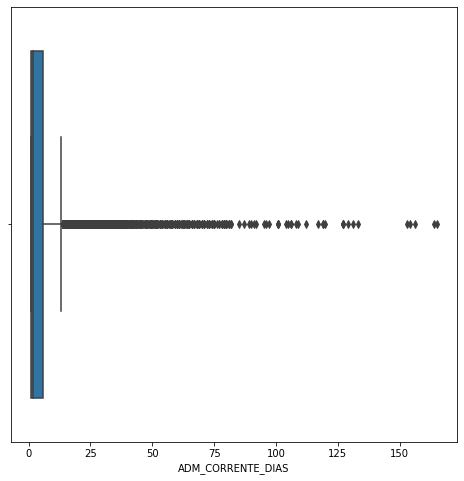

In [19]:
# Removendo os outliers
dataset = dataset.drop(dataset[(dataset['ADM_CORRENTE_DIAS'] > 180)].index)
sns.boxplot(dataset.ADM_CORRENTE_DIAS)

<AxesSubplot:xlabel='NUM_DIAS_INT_PREVIA'>

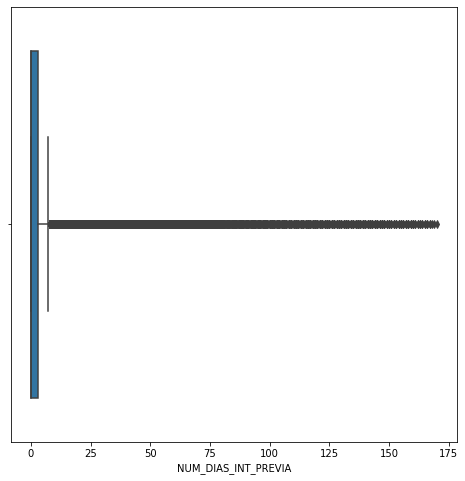

In [20]:
# Visualizando os outliers da variável NUM_DIAS_INT_PREVIA
sns.boxplot(dataset.NUM_DIAS_INT_PREVIA)

<AxesSubplot:xlabel='ADM_PREVIA_DIAS'>

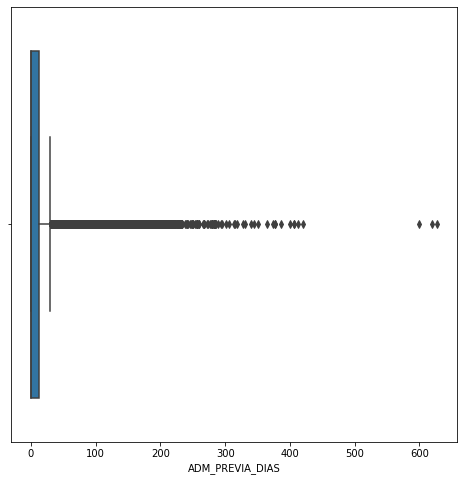

In [21]:
# Visualizando os outliers da variável ADM_PREVIA_DIAS
sns.boxplot(dataset.ADM_PREVIA_DIAS)

<AxesSubplot:xlabel='ADM_PREVIA_DIAS'>

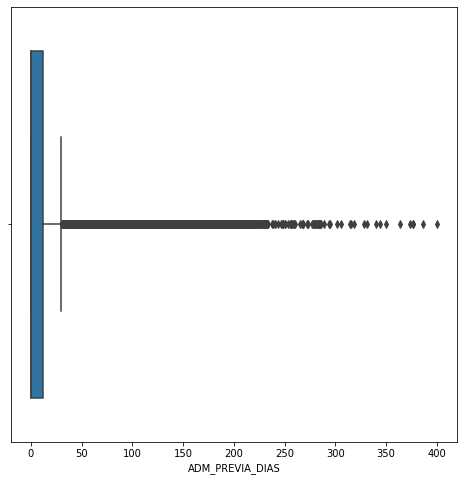

In [22]:
# Removendo os outliers
dataset = dataset.drop(dataset[(dataset['ADM_PREVIA_DIAS'] > 400)].index)
sns.boxplot(dataset.ADM_PREVIA_DIAS)

<AxesSubplot:xlabel='NUM_DIAS_LIC_MEDICA'>

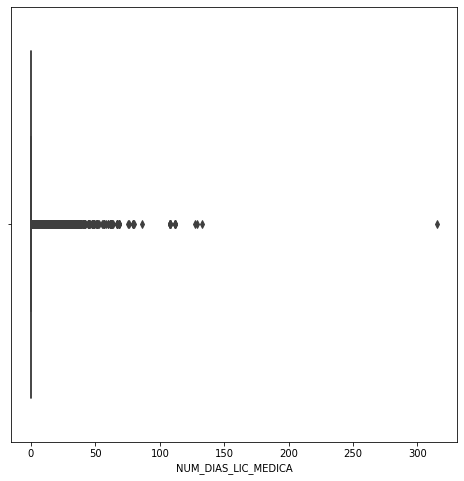

In [23]:
# Visualizando os outliers da variável NUM_DIAS_LIC_MEDICA
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

<AxesSubplot:xlabel='NUM_DIAS_LIC_MEDICA'>

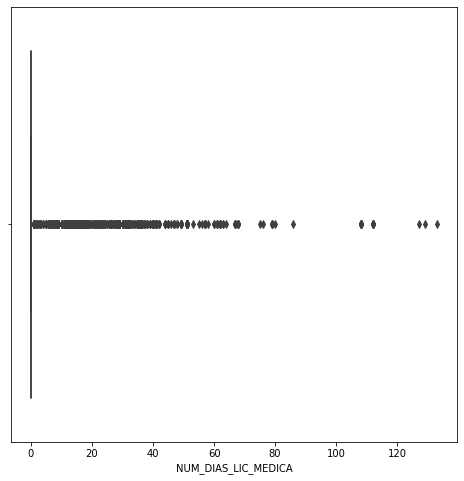

In [24]:
# Removendo os outliers
dataset = dataset.drop(dataset[(dataset['NUM_DIAS_LIC_MEDICA'] > 150)].index)
sns.boxplot(dataset.NUM_DIAS_LIC_MEDICA)

### 2.2 - Correlação e Associação

In [25]:
# Criando uma cópia do dataset original
dataset_teste = dataset.copy()

In [26]:
# Cópia do dataset
dataset_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [27]:
dataset_teste.dtypes

IDADE                  float64
SEXO_F                   int64
SEXO_M                   int64
ADM_CORRENTE_DIAS        int64
RECEB_MEDICAMENTOS       int64
FEZ_EXAMES               int64
DEPEND_QUIMICO           int64
FUMANTE                  int64
ALCOOLISMO               int64
NUM_DIAS_INT_PREVIA      int64
ADM_PREVIA_DIAS          int64
NUM_DIAS_LIC_MEDICA      int64
READMISSAO_30_DIAS       int64
dtype: object

In [28]:
# Convertendo as variáveis categóricas para o tipo categórico em Python
# Como queremos apenas avaliar a associação com a variável resposta estamos trabalhando com uma cópia do dataset original.
dataset_teste['SEXO_F'] = dataset_teste['SEXO_F'].astype('category')
dataset_teste['SEXO_M'] = dataset_teste['SEXO_M'].astype('category')
dataset_teste['RECEB_MEDICAMENTOS'] = dataset_teste['RECEB_MEDICAMENTOS'].astype('category')
dataset_teste['FEZ_EXAMES'] = dataset_teste['FEZ_EXAMES'].astype('category')
dataset_teste['DEPEND_QUIMICO'] = dataset_teste['DEPEND_QUIMICO'].astype('category')
dataset_teste['FUMANTE'] = dataset_teste['FUMANTE'].astype('category')
dataset_teste['ALCOOLISMO'] = dataset_teste['ALCOOLISMO'].astype('category')
dataset_teste['READMISSAO_30_DIAS'] = dataset_teste['READMISSAO_30_DIAS'].astype('category')

In [29]:
# Visualizando os tipos de dados
dataset_teste.dtypes

IDADE                   float64
SEXO_F                 category
SEXO_M                 category
ADM_CORRENTE_DIAS         int64
RECEB_MEDICAMENTOS     category
FEZ_EXAMES             category
DEPEND_QUIMICO         category
FUMANTE                category
ALCOOLISMO             category
NUM_DIAS_INT_PREVIA       int64
ADM_PREVIA_DIAS           int64
NUM_DIAS_LIC_MEDICA       int64
READMISSAO_30_DIAS     category
dtype: object

<AxesSubplot:>

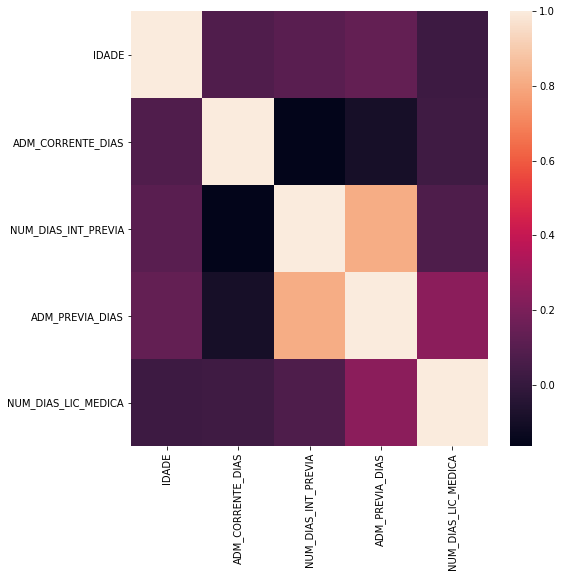

In [30]:
# Coeficiente de correlação é calculado para variáveis numéricas
dataset_teste_corr = dataset_teste.corr()
sns.heatmap(dataset_teste_corr)

In [31]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [32]:
# Coleta as variáveis categóricas do dataset
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

categorical_vars = []

for column in dataset_teste:
    if is_string_dtype(dataset_teste[column]):
        categorical_vars.append(column)

In [33]:
categorical_vars

[]

In [34]:
y = 'READMISSAO_30_DIAS'

print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(dataset_teste[var], dataset_teste[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.




### 2.3 - Pré-Processamento

In [35]:
dataset.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA,READMISSAO_30_DIAS
ID,,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0,1
1,24.0,0,1,2,0,0,1,0,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0,0


In [36]:
# Verificando se a variável resposta está balanceada
target_count = dataset.READMISSAO_30_DIAS.value_counts()
target_count

0    94827
1    22173
Name: READMISSAO_30_DIAS, dtype: int64

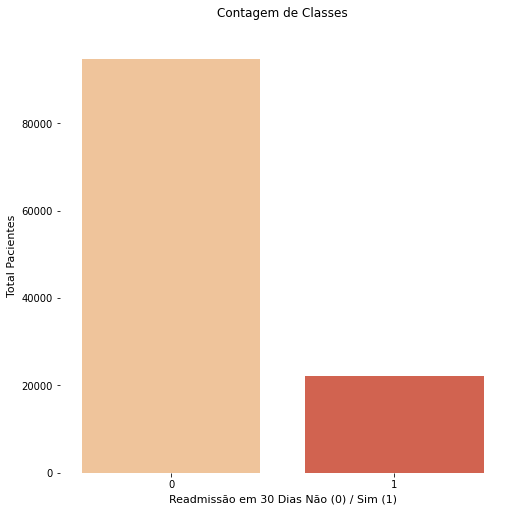

In [37]:
# Plot 
sns.countplot(dataset.READMISSAO_30_DIAS, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [38]:
# Variáveis Explicativas
dataset.iloc[:, 0:12]  

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
ID,,,,,,,,,,,,
0,62.0,1,0,1,0,1,0,0,0,0,0,0
1,24.0,0,1,2,0,0,1,0,0,0,0,0
2,77.0,0,1,2,0,0,1,0,0,2,2,0
3,68.0,0,1,7,0,0,1,0,0,2,2,0
4,83.0,0,1,2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129995,79.0,0,1,1,1,0,0,0,0,1,1,0
129996,61.0,0,1,1,0,1,0,0,0,1,9,0
129997,52.0,0,1,4,1,0,0,0,0,0,0,0


In [39]:
# Variável Target
dataset.iloc[:, -1] 

ID
0         1
1         0
2         0
3         0
4         0
         ..
129995    0
129996    1
129997    0
129998    0
129999    0
Name: READMISSAO_30_DIAS, Length: 117000, dtype: int64

In [40]:
# Importa a função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = dataset.iloc[:, 0:12]  
y = dataset.iloc[:, -1] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

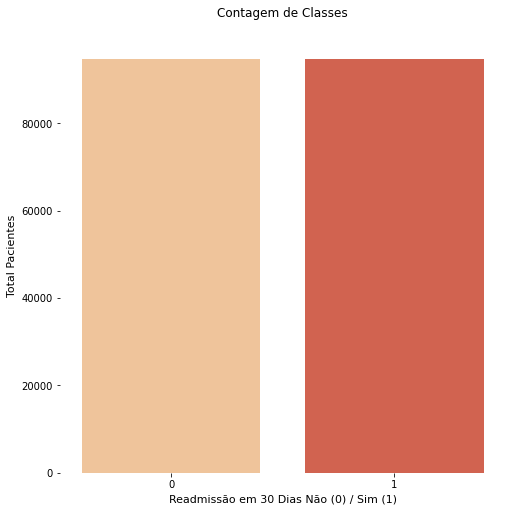

In [41]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Readmissão em 30 Dias Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [42]:
# Split em X e Y
X = X_res
Y = y_res

In [43]:
X.shape

(189654, 12)

In [44]:
Y.shape

(189654,)

In [45]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

test_size = 0.1
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = test_size, random_state = 7)

In [46]:
X_treino.shape

(170688, 12)

In [47]:
Y_treino.shape

(170688,)

In [48]:
X_teste.shape

(18966, 12)

In [49]:
Y_teste.shape

(18966,)

## 3.0 - Construção dos Modelos Preditivos

In [50]:
# Imports
import keras
import tensorflow
import sklearn
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score
from sklearn.metrics import roc_curve, auc

### Versão 1 - Regressão Logística

In [51]:
# Cria e treina o modelo
modelo_v1 = LogisticRegression(max_iter = 600)
modelo_v1.fit(X_treino, Y_treino)

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=600)

In [52]:
# Previsões (probabilidades)
previsoes_v1 = modelo_v1.predict_proba(X_teste)
previsoes_v1

array([[0.73240115, 0.26759885],
       [0.18351874, 0.81648126],
       [0.00192981, 0.99807019],
       ...,
       [0.19827892, 0.80172108],
       [0.00252933, 0.99747067],
       [0.20013276, 0.79986724]])

In [53]:
# Previsões (classes)
previsoes_v1 = modelo_v1.predict(X_teste)
previsoes_v1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
matriz_v1 = confusion_matrix(Y_teste, previsoes_v1)
print(matriz_v1)

[[7814 1688]
 [2671 6793]]


In [55]:
# Relatório de classificação
classe_names = ['Não Readmitido (0)', 'Readmitido (1)']
report = classification_report(Y_teste, previsoes_v1, target_names = classe_names)
print(report)

                    precision    recall  f1-score   support

Não Readmitido (0)       0.75      0.82      0.78      9502
    Readmitido (1)       0.80      0.72      0.76      9464

          accuracy                           0.77     18966
         macro avg       0.77      0.77      0.77     18966
      weighted avg       0.77      0.77      0.77     18966



In [56]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v1))

0.7700629004028694


In [57]:
# Extrai as taxas de verdadeiros e falsos positivos
taxa_falso_positivo, taxa_verdadeiro_positivo, thresholds = roc_curve(Y_teste, previsoes_v1)

In [58]:
taxa_falso_positivo

array([0.        , 0.17764681, 1.        ])

In [59]:
taxa_verdadeiro_positivo

array([0.        , 0.71777261, 1.        ])

In [60]:
thresholds

array([2, 1, 0], dtype=int64)

In [61]:
# Score AUC
print(auc(taxa_falso_positivo, taxa_verdadeiro_positivo))

0.7700629004028694


In [62]:
# Score AUCROC - Caso 1
y_pred_class = modelo_v1.predict(X_teste)
print(roc_auc_score(Y_teste, y_pred_class))

0.7700629004028694


In [63]:
# Score AUCROC - Caso 2
# Por que o resultado é diferente?
y_pred_probs = modelo_v1.predict_proba(X_teste)[:,1] # Usamos [:,1] para buscar as probabilidades da classe positiva.
print(roc_auc_score(Y_teste, y_pred_probs))

0.8353973739656713


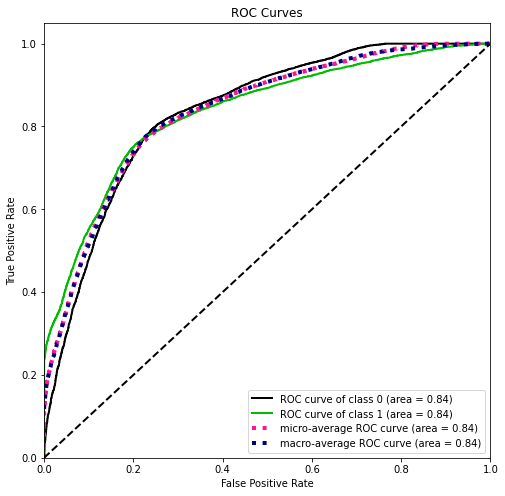

In [64]:
# Calcula a Curva ROC para cada classe
y_probs_v1 = modelo_v1.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v1)
plt.show()

In [65]:
# Se as classes estiverem desbalanceadas, o ideal é usar a curva precision-recall 
from sklearn.metrics import precision_recall_curve

y_probs = modelo_v1.predict_proba(X_teste)[:,1]
precision, recall, thresholds = precision_recall_curve(Y_teste, y_probs)

In [66]:
precision

array([0.4994986 , 0.49947218, 0.49949855, ..., 1.        , 1.        ,
       1.        ])

In [67]:
recall

array([1.00000000e+00, 9.99894336e-01, 9.99894336e-01, ...,
       2.11327134e-04, 1.05663567e-04, 0.00000000e+00])

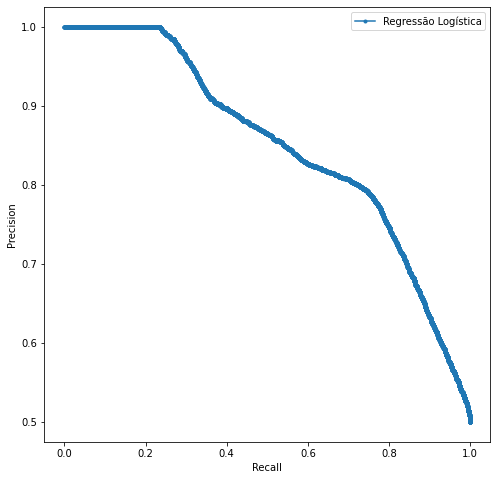

In [68]:
# Plot da curva precision-recall 
plt.plot(recall, precision, marker = '.', label = 'Regressão Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [69]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v1))

0.5431653446688114


### Versão 2 - RandomForest

In [70]:
# Cria e treina o modelo
modelo_v2 = RandomForestClassifier(n_estimators = 150)
modelo_v2.fit(X_treino, Y_treino)

RandomForestClassifier(n_estimators=150)

In [71]:
# Previsões
previsoes_v2 = modelo_v2.predict(X_teste)
matriz_v2 = confusion_matrix(Y_teste, previsoes_v2)
print(matriz_v2)

[[8112 1390]
 [1703 7761]]


In [72]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v2)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      9502
           1       0.85      0.82      0.83      9464

    accuracy                           0.84     18966
   macro avg       0.84      0.84      0.84     18966
weighted avg       0.84      0.84      0.84     18966



In [73]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v2))

0.8368849762109075


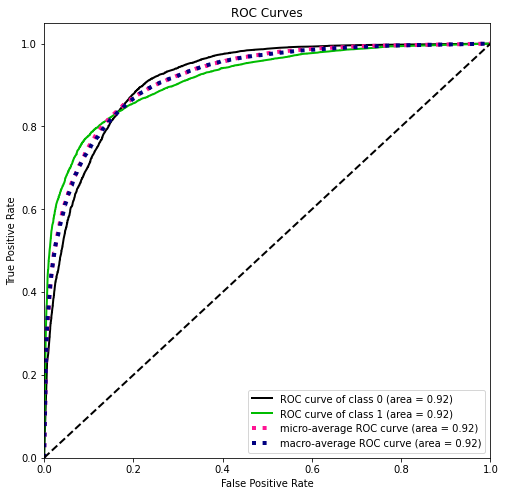

In [74]:
# Calcula a Curva ROC para cada classe
y_probs_v2 = modelo_v2.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v2)
plt.show()

In [75]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v2))

0.6741818995630635


In [76]:
X_treino.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
146799,76.00000,0,1,1,0,1,0,0,0,1,2,0
13873,54.00000,0,1,1,1,0,0,0,0,0,0,0
141112,53.00000,0,1,1,0,0,0,0,0,4,8,0
178346,42.94967,0,1,1,0,0,1,0,0,0,0,0
49564,73.00000,0,1,7,0,0,1,0,0,0,0,0


### Versão 3 - Naive Bayes

#### Modelo MultinomialNB

In [79]:
# Cria e treina o modelo MultinomialNB (variáveis quantitativas discretas)
modelo_v3 = MultinomialNB()
modelo_v3.fit(X_treino, Y_treino)

MultinomialNB()

In [80]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[8106 1396]
 [4972 4492]]


In [81]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.85      0.72      9502
           1       0.76      0.47      0.59      9464

    accuracy                           0.66     18966
   macro avg       0.69      0.66      0.65     18966
weighted avg       0.69      0.66      0.65     18966



In [82]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.6638621526135087


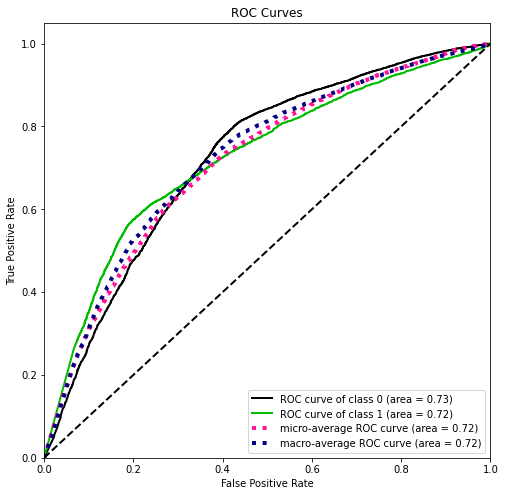

In [83]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [84]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.3541595548592588


#### Modelo BernoulliNB

In [85]:
# Cria e treina o modelo BernoulliNB (variáveis quantitativas discretas)
modelo_v3 = BernoulliNB()
modelo_v3.fit(X_treino, Y_treino)

BernoulliNB()

In [86]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[6856 2646]
 [2340 7124]]


In [87]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      9502
           1       0.73      0.75      0.74      9464

    accuracy                           0.74     18966
   macro avg       0.74      0.74      0.74     18966
weighted avg       0.74      0.74      0.74     18966



In [88]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.7371397808674172


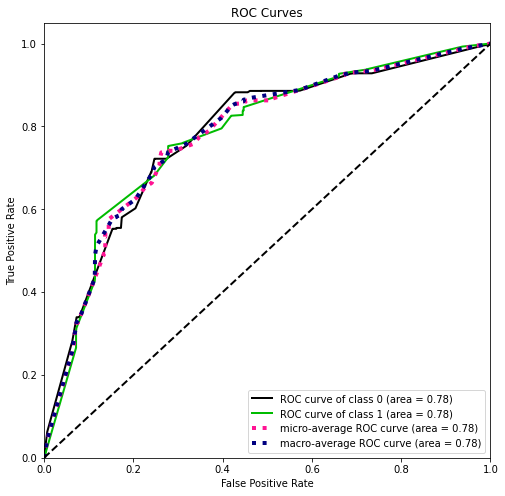

In [89]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [90]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.4744959671077635


#### Modelo GaussianNB

In [91]:
# Cria e treina o modelo GaussianNB (variáveis quantitativas com distribuição normal)
modelo_v3 = GaussianNB()
modelo_v3.fit(X_treino, Y_treino)


GaussianNB()

In [92]:
# Previsões
previsoes_v3 = modelo_v3.predict(X_teste)
matriz_v3 = confusion_matrix(Y_teste, previsoes_v3)
print(matriz_v3)

[[7685 1817]
 [3279 6185]]


In [93]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v3)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      9502
           1       0.77      0.65      0.71      9464

    accuracy                           0.73     18966
   macro avg       0.74      0.73      0.73     18966
weighted avg       0.74      0.73      0.73     18966



In [94]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v3))

0.7311531313512678


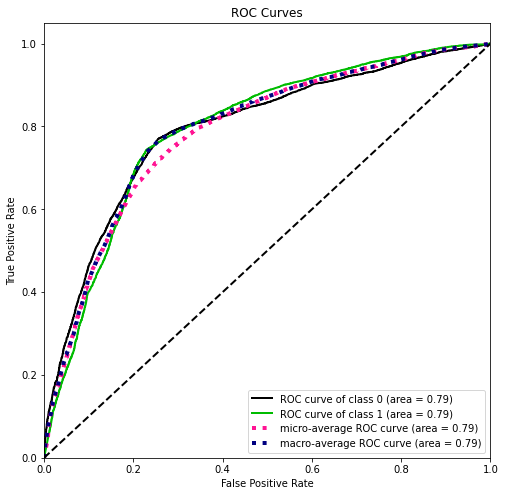

In [95]:
# Calcula a Curva ROC para cada classe
y_probs_v3 = modelo_v3.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v3)
plt.show()

In [96]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v3))

0.4680485116987696


### Versão 4 - KNN

In [97]:
# Cria e treina o modelo
modelo_v4 = KNeighborsClassifier()
modelo_v4.fit(X_treino, Y_treino)

KNeighborsClassifier()

In [98]:
# Previsões
previsoes_v4 = modelo_v4.predict(X_teste)
matriz_v4 = confusion_matrix(Y_teste, previsoes_v4)
print(matriz_v4)

[[7308 2194]
 [1605 7859]]


In [99]:
# Relatório de classificação
report = classification_report(Y_teste, previsoes_v4)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      9502
           1       0.78      0.83      0.81      9464

    accuracy                           0.80     18966
   macro avg       0.80      0.80      0.80     18966
weighted avg       0.80      0.80      0.80     18966



In [100]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v4))

0.7997556082422831


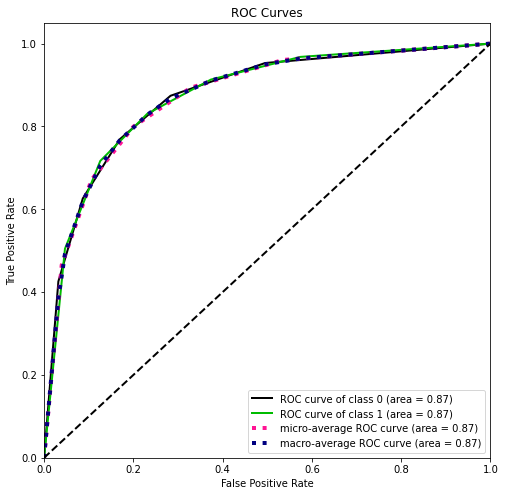

In [101]:
# Calcula a Curva ROC para cada classe
y_probs_v4 = modelo_v4.predict_proba(X_teste)
skplt.metrics.plot_roc_curve(Y_teste, y_probs_v4)
plt.show()

In [102]:
# Coeficiente de Correlação Matthews
print(matthews_corrcoef(Y_teste, previsoes_v4))

0.6005959471109272


### Validação Cruzada

Uma vez que terminamos de treinar nosso modelo, não podemos assumir que ele funcionará bem em dados que ainda não foram vistos. Em outras palavras, não podemos ter certeza de que o modelo terá a precisão e a variação desejadas no ambiente de produção. 

Precisamos de algum tipo de garantia da precisão das previsões que nosso modelo está divulgando. Para isso, precisamos validar nosso modelo. Esse processo, de decidir se os resultados numéricos que quantificam as relações entre variáveis ​​são aceitáveis​​ como descrições dos dados, é conhecido como validação.

A Validação Cruzada (CV - Cross Validation) é uma das técnicas usadas para testar a eficácia de modelos de aprendizado de máquina; também é um procedimento de re-amostragem usado para avaliar um modelo se tivermos dados limitados. Para executar o CV, fazemos divisões sucessivas nos dados, separando em treino e teste, mas fazendo com o que o algoritmo passe por todo conjunto de dados. As duas abordagens principais são:

- Train_Test Split approach
- K-Folds Cross Validation

Usaremos a segunda.


#### K-Folds Cross Validation


In [103]:
# Função para imprimir o resultado da validação cruzada

# Ao realizar a validação cruzada, podemos usar todos os nossos dados, tanto para treinamento quanto para teste, 
# enquanto avaliamos nosso algoritmo de aprendizado em exemplos nunca antes vistos.

# Observe que estamos usando X e Y

# Função para validação cruzada com duas métricas
def validacao_cruzada(modelo) :
    cv_results = cross_validate(modelo, X, Y, scoring = ['accuracy', 'roc_auc'], cv = 5)

    print('\nAcurácia em Teste:', float(format(np.mean(cv_results['test_accuracy']), '.3f')))
    print('AUC em Teste:', float(format(np.mean(cv_results['test_roc_auc']), '.3f')))
    print()

In [104]:
%%time
modelos = [LogisticRegression(max_iter = 4000), 
           RandomForestClassifier(n_estimators = 150), 
           GaussianNB(), 
           KNeighborsClassifier()]

for modelo in modelos:
    print("\nModelo e Parâmetros:", modelo)
    validacao_cruzada(modelo)


Modelo e Parâmetros: LogisticRegression(max_iter=4000)

Acurácia em Teste: 0.767
AUC em Teste: 0.833


Modelo e Parâmetros: RandomForestClassifier(n_estimators=150)

Acurácia em Teste: 0.82
AUC em Teste: 0.906


Modelo e Parâmetros: GaussianNB()

Acurácia em Teste: 0.726
AUC em Teste: 0.792


Modelo e Parâmetros: KNeighborsClassifier()

Acurácia em Teste: 0.786
AUC em Teste: 0.855

Wall time: 7min 43s


### Otimização de Hiperparâmetros

Um hiperparâmetro é um parâmetro cujo valor é definido antes do início do processo de aprendizado.

Alguns exemplos de hiperparâmetros incluem penalidade na regressão logística e perda na descida do gradiente estocástico. No sklearn, os hiperparâmetros são passados como argumentos para o construtor das classes de modelo.

Principais Estratégias de Otimização de Hiperparâmetros:

- Pesquisa em grade (Grid Search)
- Pesquisa aleatória (Random Search)

Usaremos o primeiro.


#### Grid Search

In [105]:
# Imports
import pandas as pd
import numpy as np

# Função para o Grid Search
from sklearn.model_selection import GridSearchCV

# Classe para a otimização de hiperparâmetros
class OtimizaHiperparametros:

    # Construtor da classe
    def __init__(self, models, params):
        
        # Verfica se algum modelo não tem hiperparâmetros para otimização
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Alguns estimadores estão com parâmetros ausentes: %s" % missing_params)
            
        # Inicia os atributos da classe
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    # Método para executar o Grid Search
    def fit(self, X, y, cv = 3, n_jobs = 3, verbose = 1, scoring = None, refit = False):
        
        # Loop por cada modelo (chave)
        for key in self.keys:
            print("\nExecutando GridSearchCV Para o Modelo %s:" % key)
            model = self.models[key]
            params = self.params[key]
            
            # Cria o objeto Grid Search para cada modelo
            gs = GridSearchCV(model, 
                              params, 
                              cv = cv, 
                              n_jobs = n_jobs, 
                              verbose = verbose, 
                              scoring = scoring, 
                              refit = refit, 
                              return_train_score = True)
            
            # Executa o Grid Search 
            gs.fit(X,y)
            
            # Salva o nome do modelo que foi processado
            self.grid_searches[key] = gs    

    # Método para calcular o score (métrica final)
    def score_summary(self, sort_by = 'mean_score'):
        
        # Função para criar uma linha com cada resultado do Grid Search
        def row(key, scores, params):
            d = {
                 'modelo': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        
        # Para cada resultado, retorna o resultadoo formatado
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            # Junta tudo em uma única estrutura
            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        # Gera cada coluna
        columns = ['modelo', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [106]:
# Lista dos modelos para otimização
lista_modelos = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

lista_modelos

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier()}

In [107]:
# Grid de parâmetros que serão testados
grid_parametros = {
    'LogisticRegression': { 'max_iter': [4000, 5000, 8000, 10000] },
    'RandomForestClassifier': { 'n_estimators': [175, 200, 225, 250] },
    'KNeighborsClassifier': { 'n_neighbors': [4, 5, 6, 7], 'metric': ['minkowski'], 'p': [1, 2, 3] }
}

grid_parametros

{'LogisticRegression': {'max_iter': [4000, 5000, 8000, 10000]},
 'RandomForestClassifier': {'n_estimators': [175, 200, 225, 250]},
 'KNeighborsClassifier': {'n_neighbors': [4, 5, 6, 7],
  'metric': ['minkowski'],
  'p': [1, 2, 3]}}

In [108]:
# Cria o otimizador de parâmetros (instância da classe)
otimizador_parametros = OtimizaHiperparametros(lista_modelos, grid_parametros)

In [109]:
%%time

# Executa o otimizador
otimizador_parametros.fit(X_treino, Y_treino, scoring = 'roc_auc', n_jobs = 2)


Executando GridSearchCV Para o Modelo LogisticRegression:
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Executando GridSearchCV Para o Modelo RandomForestClassifier:
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Executando GridSearchCV Para o Modelo KNeighborsClassifier:
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Wall time: 20min 30s


In [110]:
# Sumário da otimização
otimizador_parametros.score_summary(sort_by = 'max_score')

LogisticRegression
RandomForestClassifier
KNeighborsClassifier


,modelo,min_score,mean_score,max_score,std_score,max_iter,n_estimators,metric,n_neighbors,p
7,RandomForestClassifier,0.905586,0.906124,0.906532,0.000397,NaN,250,NaN,NaN,NaN
6,RandomForestClassifier,0.905632,0.906073,0.906461,0.000341,NaN,225,NaN,NaN,NaN
5,RandomForestClassifier,0.905312,0.905921,0.906283,0.000433,NaN,200,NaN,NaN,NaN
4,RandomForestClassifier,0.905426,0.905935,0.906237,0.000362,NaN,175,NaN,NaN,NaN
11,KNeighborsClassifier,0.860853,0.862308,0.863938,0.001265,NaN,NaN,minkowski,5,1
14,KNeighborsClassifier,0.861922,0.862583,0.863413,0.00062,NaN,NaN,minkowski,6,1
17,KNeighborsClassifier,0.861973,0.86238,0.862699,0.000303,NaN,NaN,minkowski,7,1
8,KNeighborsClassifier,0.857353,0.858864,0.860675,0.001372,NaN,NaN,minkowski,4,1
12,KNeighborsClassifier,0.857199,0.858902,0.860281,0.001279,NaN,NaN,minkowski,5,2
15,KNeighborsClassifier,0.858153,0.859055,0.859767,0.000672,NaN,NaN,minkowski,6,2


### Versão 5 - Deep Learning

In [111]:
X_treino.shape

(170688, 12)

In [112]:
# Construção do modelo com Keras
# Definimos diversas camadas e aplicamos regularização com dropout para evitar o overfitting

modelo_v5 = Sequential()
modelo_v5.add(Dense(256, input_dim = 12, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(256, activation = 'relu'))
modelo_v5.add(Dropout(0.5))
modelo_v5.add(Dense(1, activation = 'sigmoid'))
modelo_v5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [113]:
%%time

# Treinamos o modelo
history = modelo_v5.fit(X_treino, Y_treino, epochs = 100, batch_size = 128, verbose = 1, validation_split = 0.1)

Epoch 1/100
1201/1201 [==============================] - 9s 7ms/step - loss: 0.6529 - accuracy: 0.6982 - val_loss: 0.5583 - val_accuracy: 0.7443
Epoch 2/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.5437 - accuracy: 0.7539 - val_loss: 0.5150 - val_accuracy: 0.7701
Epoch 3/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.5256 - accuracy: 0.7646 - val_loss: 0.5071 - val_accuracy: 0.7773
Epoch 4/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.5055 - accuracy: 0.7709 - val_loss: 0.4889 - val_accuracy: 0.7793
Epoch 5/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4932 - accuracy: 0.7743 - val_loss: 0.4731 - val_accuracy: 0.7831
Epoch 6/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4869 - accuracy: 0.7768 - val_loss: 0.4693 - val_accuracy: 0.7840
Epoch 7/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4858 - accuracy: 0.7774 - val_loss: 0.4728 - val_ac

1201/1201 [==============================] - 7s 6ms/step - loss: 0.4759 - accuracy: 0.7805 - val_loss: 0.4655 - val_accuracy: 0.7866
Epoch 58/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4742 - accuracy: 0.7811 - val_loss: 0.4663 - val_accuracy: 0.7865
Epoch 59/100
1201/1201 [==============================] - 8s 7ms/step - loss: 0.4746 - accuracy: 0.7813 - val_loss: 0.4758 - val_accuracy: 0.7877
Epoch 60/100
1201/1201 [==============================] - 8s 6ms/step - loss: 0.4745 - accuracy: 0.7804 - val_loss: 0.4699 - val_accuracy: 0.7877
Epoch 61/100
1201/1201 [==============================] - 8s 6ms/step - loss: 0.4756 - accuracy: 0.7805 - val_loss: 0.4643 - val_accuracy: 0.7862
Epoch 62/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4752 - accuracy: 0.7812 - val_loss: 0.4710 - val_accuracy: 0.7863
Epoch 63/100
1201/1201 [==============================] - 7s 6ms/step - loss: 0.4749 - accuracy: 0.7804 - val_loss: 0.4714 - val_accuracy

In [114]:
# Sumário do modelo
modelo_v5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3328      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


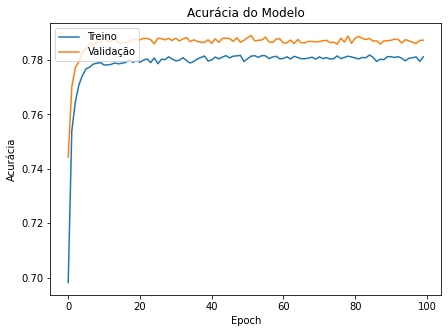

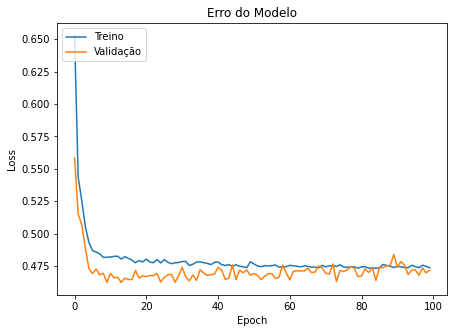

In [115]:
# Sumário da Acurácia
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

# Loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erro do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Validação'], loc = 'upper left')
plt.show()

In [120]:
# Previsões
previsoes_v5 = modelo_v5.predict(X_teste)
previsoes_v5 = np.round(previsoes_v5).astype(int)
matriz_v5 = confusion_matrix(Y_teste, previsoes_v5)
print(matriz_v5)



[[7721 1781]
 [2272 7192]]


In [121]:
# Relatório de Classificação
report = classification_report(Y_teste, previsoes_v5)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      9502
           1       0.80      0.76      0.78      9464

    accuracy                           0.79     18966
   macro avg       0.79      0.79      0.79     18966
weighted avg       0.79      0.79      0.79     18966



In [122]:
# Score AUC
print(roc_auc_score(Y_teste, previsoes_v5))

0.7862490754715873


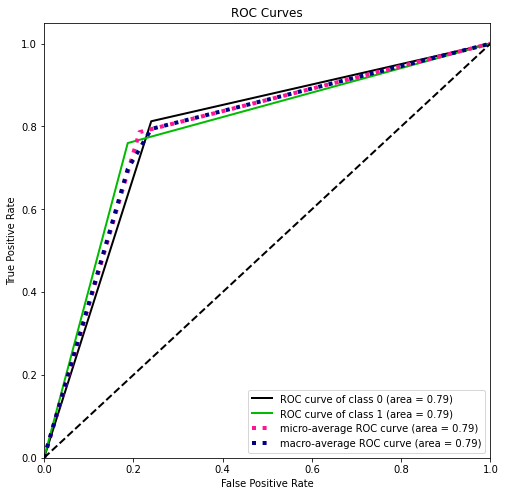

In [143]:
# Plot das métricas
import scikitplot as skplt
import matplotlib.pyplot as plt
f, (ax1) = plt.subplots(1)

# Calcula a Curva ROC para cada classe
def predict_prob(number):
  return [number[0],1-number[0]]

y_prob_v5 = np.array(list(map(predict_prob, modelo_v5.predict(X_teste))))
y_prob_v5 


# Precisamos usar esse procedimento pois o Keras apresenta apenas a probabilidade da classe prevista
skplt.metrics.plot_roc(Y_teste, np.concatenate((1 - y_probs_v5, y_probs_v5), axis = 1), ax = ax1)
plt.show()

In [144]:
# Coeficiente de Correlação de Matthews
print(matthews_corrcoef(Y_teste, previsoes_v5))

0.5733267292093919


### 3.1 - Comparando os Modelos

In [145]:
# Comparando o Score AUC dos modelos

# Cria lista vazia
lista_auc = []

# Calcula o Score AUC para cada modelo
auc_modelo_v1 = roc_auc_score(Y_teste, previsoes_v1)
auc_modelo_v2 = roc_auc_score(Y_teste, previsoes_v2)
auc_modelo_v3 = roc_auc_score(Y_teste, previsoes_v3)
auc_modelo_v4 = roc_auc_score(Y_teste, previsoes_v4)
auc_modelo_v5 = roc_auc_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_auc = [auc_modelo_v1, auc_modelo_v2, auc_modelo_v3, auc_modelo_v4, auc_modelo_v5]

In [146]:
# Comparando o Coeficiente de Correlação de Matthews dos modelos

# Cria lista vazia
lista_mcorr = []

# Calcula o Coeficiente para cada modelo
mcorr_v1 = matthews_corrcoef(Y_teste, previsoes_v1)
mcorr_v2 = matthews_corrcoef(Y_teste, previsoes_v2)
mcorr_v3 = matthews_corrcoef(Y_teste, previsoes_v3)
mcorr_v4 = matthews_corrcoef(Y_teste, previsoes_v4)
mcorr_v5 = matthews_corrcoef(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_mcorr = [mcorr_v1, mcorr_v2, mcorr_v3, mcorr_v4, mcorr_v5]

In [147]:
# Comparando a Acurácia dos modelos

# Cria lista vazia
lista_acc = []

# Calcula a Acurácia para cada modelo
acc_modelo_v1 = accuracy_score(Y_teste, previsoes_v1)
acc_modelo_v2 = accuracy_score(Y_teste, previsoes_v2)
acc_modelo_v3 = accuracy_score(Y_teste, previsoes_v3)
acc_modelo_v4 = accuracy_score(Y_teste, previsoes_v4)
acc_modelo_v5 = accuracy_score(Y_teste, previsoes_v5)

# Junta os resultados em uma lista
lista_acc = [acc_modelo_v1, acc_modelo_v2, acc_modelo_v3, acc_modelo_v4, acc_modelo_v5]

In [148]:
# Concatena as 3 listas de métricas em uma única tabela
lista_metricas = pd.DataFrame(np.column_stack([lista_auc, lista_mcorr, lista_acc]), 
                              columns = ['AUC', 'Matthews', 'Acurácia'])

# Adiciona uma coluna com os nomes dos modelos
lista_metricas['Modelo'] = ['Regressão Logística', 'RandomForest', 'Naive Bayes', 'KNN', 'Deep Learning']

In [149]:
# Lista as métricas por ordem decrescente do Score AUC
lista_metricas.sort_values(by ='AUC', ascending = False)

,AUC,Matthews,Acurácia,Modelo
1,0.836885,0.674182,0.836919,RandomForest
3,0.799756,0.600596,0.799694,KNN
4,0.786249,0.573327,0.786302,Deep Learning
0,0.770063,0.543165,0.770168,Regressão Logística
2,0.731153,0.468049,0.731309,Naive Bayes


### 3.2 - Preparando a Versão Final do Modelo

In [150]:
# Cria e treina o modelo
modelo_final_rf = RandomForestClassifier(n_estimators = 200)
modelo_final_rf.fit(X_treino, Y_treino)

RandomForestClassifier(n_estimators=200)

In [151]:
# Salvando o modelo
import pickle
filename = 'modelos/modelo_final.sav'
pickle.dump(modelo_final_rf, open(filename, 'wb'))

In [152]:
# Carregando o Modelo
classificador_pacientes = pickle.load(open(filename, 'rb'))

In [153]:
classificador_pacientes

RandomForestClassifier(n_estimators=200)

## 4.0 - Deploy do Modelo

In [154]:
# Os novos dados devem estar no mesmo formato usado nos dados de teste
X_teste.head()

,IDADE,SEXO_F,SEXO_M,ADM_CORRENTE_DIAS,RECEB_MEDICAMENTOS,FEZ_EXAMES,DEPEND_QUIMICO,FUMANTE,ALCOOLISMO,NUM_DIAS_INT_PREVIA,ADM_PREVIA_DIAS,NUM_DIAS_LIC_MEDICA
138614,77.000000,1,0,5,0,0,1,0,0,1,6,0
120432,58.197334,0,1,1,0,1,0,0,0,23,83,0
189012,64.841510,0,1,1,0,0,0,0,0,37,57,0
18712,69.000000,1,0,5,0,0,1,0,0,0,0,0
160167,60.000000,0,1,1,0,0,0,0,0,8,66,0


In [155]:
X_teste.shape

(18966, 12)

In [156]:
# Dados de um novo paciente
novo_paciente = np.array([54,1,0,1,0,1,0,0,0,0,0,0])
print(novo_paciente.shape)
print(novo_paciente)

(12,)
[54  1  0  1  0  1  0  0  0  0  0  0]


In [157]:
# Ajustando o shape dos dados para o modelo
novo_paciente_reshaped = novo_paciente.reshape(1, -1)
print(novo_paciente_reshaped.shape)
print(novo_paciente_reshaped)

(1, 12)
[[54  1  0  1  0  1  0  0  0  0  0  0]]


In [158]:
# Fazendo a previsão
print("\nO paciente será readmitido na clínica em até 30 dias após a alta?")
previsao = classificador_pacientes.predict(novo_paciente_reshaped)
if previsao == 0:
      print("\nNão, o paciente não deve ser readmitido na clínica em até 30 dias após a alta.")
else:
      print("\nSim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.")


O paciente será readmitido na clínica em até 30 dias após a alta?

Sim, o paciente deve ser readmitido na clínica em até 30 dias após a alta.


# Fim